# Python Review Q&A

In [3]:
%load_ext nb_black


<IPython.core.display.Javascript object>

## Links

Some links for additional practice (general programming practice rather than pandas/data analysis):

* https://www.codewars.com/collections/basic-python
* https://www.practicepython.org/
* https://www.hackerrank.com/domains/python
* https://codingbat.com/python


Additional links:
* https://realpython.com/python-beginner-tips/ (tips for getting better at Python)
* https://automatetheboringstuff.com (full book going over tasks Python can accomplish; does have questions at the end of each chapter with answers in back of book)

### Dictionary sum

Write a function that accepts a dictionary and threshold value.  The function should sum all of the dictionary values who's keys are greater than or equal to the threshold.  The dictionary will have both numeric keys and values (ie `{1: 2, 3: 4, 5: 6}`).

Example

```python
d = {1: 2, 3: 4, 5: 6}

your_function(d, 3)
# Expected output is 10.
# The keys 3 & 5 are greater than or equal to the threshold of 3.
# The values corresponding to the keys 3 & 5 are 4 & 6, and 4 + 6 = 10.
```

In [60]:
def my_func(mydict, num):
    mysum = 0
    mystr = "x"

    for key in mydict:
        if key >= num:
            mysum += mydict[key]
    return mysum


d = {1: 2, 3: 4, 5: 6}

print(my_func(d, 3))

10


<IPython.core.display.Javascript object>

### Pandas practice

> ##### Description
> The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
>
> ##### Columns
A data frame with 32 observations on 11 (numeric) variables.
>
> ```
>  1. mpg    Miles/(US) gallon
>  2. cyl    Number of cylinders
>  3. disp   Displacement (cu.in.)
>  4. hp     Gross horsepower
>  5. drat   Rear axle ratio
>  6. wt     Weight (1000 lbs)
>  7. qsec   1/4 mile time
>  8. vs     Engine (0 = V-shaped, 1 = straight)
>  9. am     Transmission (0 = automatic, 1 = manual)
> 10. gear   Number of forward gears
> 11. carb   Number of carburetors
> ```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

mtcars_url = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv'

Read the data frame using `mtcars_url`

In [4]:
df = pd.read_csv(mtcars_url)

<IPython.core.display.Javascript object>

Print the first 8 rows of the dataframe.

In [8]:
df.head(8)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


Rename the first column to something more meaningful.

In [5]:
df.rename(columns={"Unnamed: 0": "model"}, inplace=True)

<IPython.core.display.Javascript object>

Plot the distribution of the `cyl` column.  Is this a continuous or discrete variable?

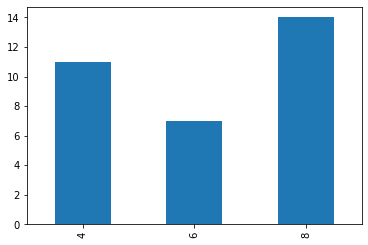

In [51]:
df['cyl'].value_counts().sort_index().plot.bar()
#discrete

What is the minimum value in the `mpg` column?

In [49]:
df.mpg.min()

10.4

What is the name of the car with `mpg` equal to `15.0`?

In [6]:
df.loc[df["mpg"] == 15.0, "model"].iloc[0]

'Maserati Bora'

<IPython.core.display.Javascript object>

What is the name of the car that has the best gas mileage?

In [20]:
print(df.sort_values(by="mpg", ascending=False).head(1)["model"].iloc[0])

Toyota Corolla


<IPython.core.display.Javascript object>

Use (1) your intuition from the variable descriptions and (2) visulaizations to find 2 variables that appear to be *positively* correlated.

Correlation level between cylinders and displacement is 0.902032872146999


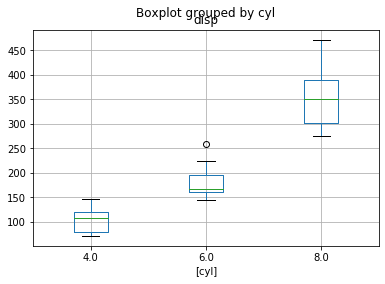

<IPython.core.display.Javascript object>

In [41]:
print(
    "Correlation level between cylinders and displacement is {}".format(
        df["cyl"].corr(df["disp"])
    )
)

# df.plot.bar(x="cyl", y="disp")

cyl_df = pd.DataFrame([df["cyl"], df["disp"]]).transpose()

cyl_df.boxplot(by="cyl")

Use (1) your intuition from the variable descriptions and (2) visulaizations to find 2 variables that appear to be *negatively* correlated.

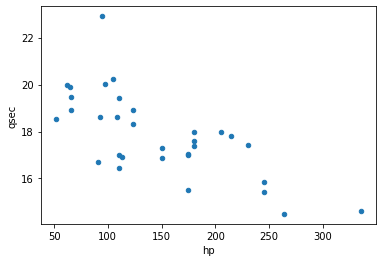

<IPython.core.display.Javascript object>

In [44]:
hp_qsec_corr = df["hp"].corr(df["qsec"])

df.plot(kind="scatter", x="hp", y="qsec")